# Static Embeddings: Exercises

## 1) Model Training

Train a custom Word2Vec Model. This time, use the full set of example sentences (rather than only the first 10). 

Think about whether or not you should set the tokens to lower case, and whether or not you should change the parameters of the Word2Vec algorithm (such as embedding dimensions and context window).

In [1]:
import pandas as pd
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

full_docs = pd.read_csv('example_sentences.csv')['sentence'].tolist()

# ...


### Solutions

In [2]:
tokenized_documents = [word_tokenize(doc.lower()) for doc in full_docs]

word2vec_model = Word2Vec(sentences=tokenized_documents, # tokenized documents (model input)
                          vector_size=100, # number of embedding dimensions
                          window=5, # context window size (nr of words to the left and right)
                          min_count=0, # drop words occuring fewer than this
                          workers=1) # number of CPU threads to use for training

## 2) Word Similarity

a) Compute the cosine similarity between "nlp" and five words of your choosing. Note: the words must be present in the model!

b) Get the 5 most similar words for "nlp" and another three words of your choosing. 

Hint: in order to access the similarity methods for your model, you need to navigate to the "wv" keyedvectors first, e.g. `word2vec_model.wv.similarity()`

In [3]:
# ...

### Solutions

In [4]:
word = 'nlp'
comparisons = ['sentiment', 'fundamental', 'text', 'spam']

for comparison in comparisons:
    similarity = word2vec_model.wv.similarity(word, comparison)
    print(f"Similarity between '{word}' and '{comparison}': {similarity}")

Similarity between 'nlp' and 'sentiment': 0.20719213783740997
Similarity between 'nlp' and 'fundamental': 0.010237975977361202
Similarity between 'nlp' and 'text': 0.07490039616823196
Similarity between 'nlp' and 'spam': -0.19802074134349823


In [5]:
words = ["nlp", "sentiment", "fundamental"]

for word in words:
    print(f"Most similar words to '{word}': {word2vec_model.wv.most_similar(word, topn=5)}")

Most similar words to 'nlp': [('logistics', 0.23090581595897675), ('language', 0.21145057678222656), ('named', 0.21000151336193085), ('sentiment', 0.20719213783740997), ('detect', 0.20715859532356262)]
Most similar words to 'sentiment': [('relations', 0.24469932913780212), ('unstructured', 0.22117476165294647), ('can', 0.2151024043560028), ('nlp', 0.20719215273857117), ('reduces', 0.20654667913913727)]
Most similar words to 'fundamental': [('needs', 0.2968629002571106), ('goal', 0.28852352499961853), ('fake', 0.26273414492607117), ('supply', 0.2444406896829605), ('discovering', 0.23470626771450043)]


## 3) Visualization

Load the `word2vec-google-news-300` model we used before, and visualize the embeddings. Since we the new model will have more tokens, it will improve visual clarity to only plot a subset of words. You can pick whichever words you choose, but you will find a suggestion below.

Before visualizing, you will need to reduce the dimensions of the embeddings. Try both the PCA algorithm (as before) and the T-SNE algorithm. What do you notice in the visualization?

Hint: Depending on the number of words you choose, you may need to adjust the "perplexity" parameter of the T- SNE algorithm to something smaller than your number of words.
    
More info on the T-SNE algorithm here: https://scikit-learn.org/stable/modules/manifold.html#t-sne

In [6]:
words = ["NLP", "sentiment", "analysis", "physics", "scientist", 
         "man", "woman", "doctor", "nurse", "research", "medicine",
         "engineering", "technology", "AI", "machine", "learning",
         "data", "big", "small", "fast", "slow", "good", "bad",
         "up", "down", "left", "right", "positive", "negative",
         "productivity", "efficiency", "accuracy", "precision",]

perplexity = len(words)-1

### Solutions

In [3]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import gensim.downloader as api

word2vec = api.load('word2vec-google-news-300')

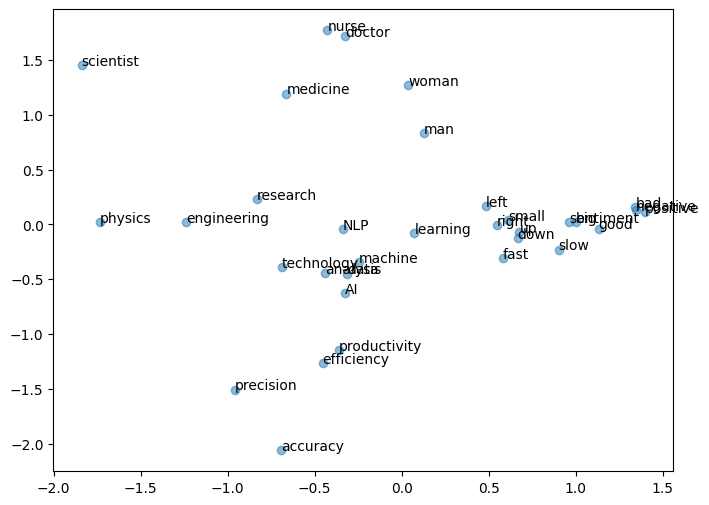

In [23]:
# Filter out words that are not in the word2vec model
words_in_model = [word for word in words if word in word2vec.key_to_index]

# Get relevant word vectors from the pre-trained model 
word_vectors = np.array([word2vec[w] for w in words_in_model])

# Apply PCA to reduce the dimensionality to 2D
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)

# Create a DataFrame for the 2D word vectors
word_vectors_2d_df = pd.DataFrame(word_vectors_2d, index=words_in_model, columns=['x', 'y'])

# Plot the 2D word vectors
plt.figure(figsize=(8, 6))
plt.scatter(word_vectors_2d_df['x'], word_vectors_2d_df['y'], alpha=0.5)

# Annotate each point with the word
for word, (x, y) in word_vectors_2d_df.iterrows():
    plt.annotate(word, (x, y))

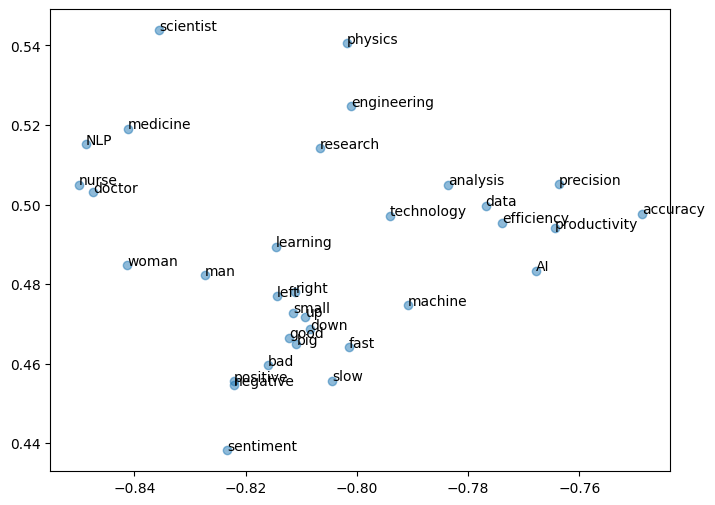

In [22]:
# Filter out words that are not in the word2vec model
words_in_model = [word for word in words if word in word2vec.key_to_index]

# Get relevant word vectors from the pre-trained model 
word_vectors = np.array([word2vec[w] for w in words_in_model])

# Apply PCA to reduce the dimensionality to 2D
tsne = TSNE(n_components=2, random_state=0, perplexity=perplexity)
word_vectors_2d = tsne.fit_transform(word_vectors)

# Create a DataFrame for the 2D word vectors
word_vectors_2d_df = pd.DataFrame(word_vectors_2d, index=words_in_model, columns=['x', 'y'])

# Plot the 2D word vectors
plt.figure(figsize=(8, 6))
plt.scatter(word_vectors_2d_df['x'], word_vectors_2d_df['y'], alpha=0.5)

# Annotate each point with the word
for word, (x, y) in word_vectors_2d_df.iterrows():
    plt.annotate(word, (x, y))

## 4) Model Bias

Think about words that may carry a certain bias in specific domains. Find term pairs (like "men" and "women" for gendered biases) and get the cosine similarity for each word of a specific domain (e.g. "nurse", "doctor", etc.). How could you analyse these differences in your own research?

In [ ]:
# ...

### Solution

In [ ]:
terms = ["...","..."] # term pair goes here - can also be more than 2 terms
comparison_words = ["...", "...", "...", ] # domain specific words to get similarity for go here

In [ ]:
for comparison in comparison_words:
    for term in terms:
        similarity = word2vec.similarity(term, comparison)
        print(f"Similarity between '{term}' and '{comparison}': {similarity}")

## Bonus

### Other Models

Load another model from the ones available in *Gensim*. Are the same biases present?

In [14]:
# List of all available models
for model_name in list(api.info()['models'].keys()):
  print(model_name)

# ...

fasttext-wiki-news-subwords-300
conceptnet-numberbatch-17-06-300
word2vec-ruscorpora-300
word2vec-google-news-300
glove-wiki-gigaword-50
glove-wiki-gigaword-100
glove-wiki-gigaword-200
glove-wiki-gigaword-300
glove-twitter-25
glove-twitter-50
glove-twitter-100
glove-twitter-200
__testing_word2vec-matrix-synopsis


#### Solution

In [15]:
# load another model

glove_wiki50 = api.load('glove-wiki-gigaword-50')



In [13]:
for comparison in comparison_words:
    for term in terms:
        similarity = glove_wiki50.similarity(term, comparison)
        print(f"Similarity between '{term}' and '{comparison}': {similarity}")

Similarity between 'man' and 'programmer': 0.26579540967941284
Similarity between 'woman' and 'programmer': 0.21927817165851593
Similarity between 'man' and 'scientist': 0.4922681748867035
Similarity between 'woman' and 'scientist': 0.4388362765312195
Similarity between 'man' and 'intelligent': 0.48836398124694824
Similarity between 'woman' and 'intelligent': 0.4218866229057312
Similarity between 'man' and 'caring': 0.4980519413948059
Similarity between 'woman' and 'caring': 0.5777766704559326
Similarity between 'man' and 'nurse': 0.5718703866004944
Similarity between 'woman' and 'nurse': 0.7155020236968994
Similarity between 'man' and 'parent': 0.4574282467365265
Similarity between 'woman' and 'parent': 0.48847782611846924
Similarity between 'man' and 'doctor': 0.7119579315185547
Similarity between 'woman' and 'doctor': 0.7252734303474426
Similarity between 'man' and 'teacher': 0.63923579454422
Similarity between 'woman' and 'teacher': 0.6849932074546814
Similarity between 'man' and '

### Analogies

Find more analogy tasks to run on the google-news-300 model. Is the model good at finding these? What does that say about the model? How does the task compare on other models?

Hint: The `most_similar` method is capable of solving analogy tasks with the `negative` and `positive` arguments. Remeber that the syntax is `X2 - X1 + Y1 = Y2`. It may help to write out your analogy and formalize it before filling in the function arguments!

#### Solution

In [5]:
# Cat is to dog as kitten is to ...
# Kitten - Cat + Dog = Puppy
word2vec.most_similar(positive=['kitten', 'dog'], negative=['cat'], topn=5)

[('puppy', 0.7699725031852722),
 ('pup', 0.6861709952354431),
 ('pit_bull', 0.6776558756828308),
 ('dogs', 0.6770986318588257),
 ('Rottweiler', 0.6646621227264404)]